# Random Walks on Graphs
We're given an _undirected_ graph $G=(V, E)$. The walk will start at some initial vertex $v_0$. At every step, it uniformly picks a neighbor and moves there. In symbols,
$$P_{uv} = Pr(X_t=v | X_{t-1}=u) =
\begin{cases}
1/d(u) & \textrm{if $(u, v) \in E$} \\
0 & \textrm{else}
\end{cases}$$
where $d(u)$ is the degree of node $u$. 

## Invariant Distribution

We're interested in the invariant distribution of this chain. Let add some constraints to guarantee the existence of stationary distribution. We know that the finite-state Markov chain has invariant distribution if it's irreducible (only one communicating class/ one connected component) and aperiodic. Irreducibility means that we cannot reduce the markov graph into smaller connected components: it only has one connected component!

To ensure irreducibility, we impose that $G$ is connected. To ensure aperiodicity, we impose that $G$ is not non-bipartite. We claim that non-bipartite $\implies$ aperiodic or the contrapositive periodic $\implies$ bipartite.  

![title](Figures/period.jpeg)

Periodic Markov graph basically looks like in the picture (red drawing has periodic 3). We claim that the periodic graph constructed from this random walk scheme can only has 2 period. Since if $A$ is a neighbor of $B$ then $B$ must also be a neighbor of $A$. So if there's edge $(A, B)$ in the Markov graph, there's $(B, A)$ right back so the maximum period is $2$. This corresponds to $G$ bipartite. 

The invariant distribution, unsurprisingly, is proportional to the vertex degree. Specifically, $\pi_v = d(v)/2m$ (check that $\pi$ is a prob. measure yourself! sum to 1 and non-negative). A vertex with high degree has a high invariant prob. This is because $v$ has a lot of connections so it gets visited more often. 

Let us check this $\pi P = \pi$ or $\pi_v = \sum_{u} P_{uv} \pi_u$. Note that
$$\sum_u P_{uv} \pi_u = \sum_{u: (u, v) \in E} P_{uv} \pi_u$$
$$=  \sum_{u: (u, v) \in E} \frac{1}{d(u)} \frac{d(u)}{2m} = \frac{d(v)}{2m} = \pi_v.$$

In [53]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


In [54]:
n_nodes = 10
edge_prob = 0.6
G = nx.erdos_renyi_graph(n_nodes, edge_prob, seed=1)
pos = nx.spring_layout(G, seed=1)

In [55]:
print("G is non-bipartite?", not nx.is_bipartite(G))
print("G is connected?", nx.is_connected(G))

G is non-bipartite? True
G is connected? True


In [56]:
def random_walk(G, v0, n_steps):
    walk = [v0] # the walk starts at v0
    for i in range(n_steps):
        v = walk[-1]
        # randomly move to neighbor
        next_v = np.random.choice(list(G.neighbors(v)))
        walk.append(next_v)
    return walk

In [57]:
# for example
n_steps= 100
walk = random_walk(G, 0, n_steps)
walk

[0,
 1,
 9,
 0,
 5,
 8,
 7,
 8,
 4,
 7,
 6,
 3,
 8,
 4,
 0,
 4,
 1,
 7,
 8,
 7,
 2,
 9,
 0,
 4,
 8,
 4,
 8,
 7,
 1,
 9,
 0,
 1,
 9,
 4,
 8,
 5,
 4,
 7,
 9,
 2,
 5,
 2,
 9,
 1,
 7,
 2,
 5,
 8,
 7,
 8,
 7,
 4,
 6,
 0,
 1,
 0,
 6,
 5,
 8,
 5,
 6,
 2,
 7,
 3,
 6,
 3,
 5,
 0,
 9,
 1,
 2,
 7,
 3,
 7,
 6,
 0,
 5,
 2,
 7,
 9,
 0,
 6,
 2,
 7,
 2,
 9,
 1,
 6,
 1,
 4,
 0,
 5,
 3,
 4,
 0,
 6,
 4,
 3,
 8,
 3,
 5]

In [58]:
def color(n, v):
    # color v differently than n - 1 other vertexes
    return ['gray']* v + ['green'] + ['gray']*(n-v-1)
color(5, 4) 

['gray', 'gray', 'gray', 'gray', 'green']

In [59]:
def update(i):
    ax.clear()
    node_color = color(n_nodes, walk[i])
    nx.draw(G, node_color=node_color, ax=ax, pos=pos, with_labels=True)
    ax.set_title("Step {}".format(i))

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


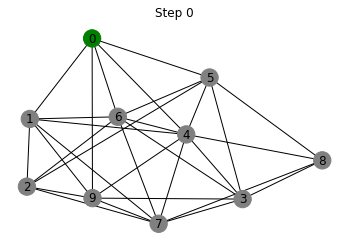

In [60]:
fig, ax = plt.subplots()
anim = FuncAnimation(fig, update, frames=n_steps, interval=1000)

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


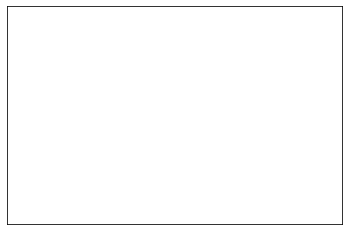

In [61]:
HTML(anim.to_html5_video())

In [62]:
from collections import Counter
Counter(walk)

Counter({0: 12, 1: 9, 9: 9, 5: 10, 8: 11, 7: 14, 4: 11, 6: 9, 3: 7, 2: 9})

In [73]:
# TODO: verify that simulation is close to stationary dist.
pi = {}
m = G.number_of_edges()
for v, d in G.degree:
    pi[v] = d/(2*m)
pi

{0: 0.08333333333333333,
 1: 0.1,
 2: 0.08333333333333333,
 3: 0.1,
 4: 0.13333333333333333,
 5: 0.1,
 6: 0.11666666666666667,
 7: 0.11666666666666667,
 8: 0.06666666666666667,
 9: 0.1}

In [74]:
# Theorem 1.7.7 
sum(pi.values())

1.0

# Hitting and Cover Time

Let $T_{uv}$ be the time for a walk starting at node $u$ to reach $v$. For example, for $u, v_1, v$, the time $T_{uv}$ is $2$ ($v_1$ and $v$). For $u, v_1, u$, the time $T_{uu}$ is $2$. Let $h_{uv} = E(T_{uv})$ be the expected time.

This seemingly innocuous equation
$$h_{uv} = \sum_{v'} P_{uv'}(1 + h_{v'v})$$
is actually not right for self-loop. (The justification for this eqn is by law of total expectation and Markov property but we need to be careful). For example, if we have just one node in the graph with self-loop with prob. 1 then the eqn claims
$$h_{uu} = P_{uu}(h_{uu} + 1)$$
$$h_{uu} = h_{uu} + 1$$
$$0 = 1 \quad ??$$

The eqn demands that we incurs one step penalty in moving from $u$ to $v'$ but this leads to weird stuff. One way to resolve this is to make $h'_{uu} = 0$ and $h'_{uv}=h'_{uv}$ if $u \not = v$. So $h_{uu}$ would go out and return to $u$ while $h'_{uu}$ just says the time is $0$ since we're already at $u$. The following eqn is correct. 
$$h_{uv} = \sum_{v'} P_{uv'}(1 + h'_{v'v})$$

In the example of the lone node with self-loop, the eqn reads $h_{uu} = h'_{uu} + 1 =1$, which is as expected. For another example, consider two state graph with $u$ goes to $v$ with prob. 1 then $h_{uv} = 1 + h'_{vv} = 1$, which is also consistent. Then difference between $h'_{uv}$ and $h_{uv}$ only arises when $u=v$. 

$h_{uv}$ is called the hitting time. (Time for walk at $u$ to hit $v$) 

The classic result is that $$h_{uu} = \frac{1}{\pi_u}$$ 
(See Norris' Markov Chains)
The proof roughly goes like this. Fix $u$, $\gamma_j$ as the time the chain visits state $j$ between two visits to $u$. Note that $\gamma_u=1$. Then,
$$h_{uu} = \sum_v \gamma_v.$$
Then, we show that $\gamma$ is an invariant measure (_measure_ not necessarily normalized to be a prob. measure i.e. sum to 1). That is
$$\gamma_v = \sum_{v'} P_{v'v} \gamma_{v'}.$$


Due to uniqueness of invariant measure, $\gamma_v \sim \pi_v$ (proportional). So $\gamma_v = c \pi_v$ for some $c$ and $h_{uu} = \sum_v \gamma_v = c \sum_v \pi_v = c$. From $\gamma_u = 1 = c \pi_u$, we know that $c=1/\pi_u$. 

Now, we have a theorem
$$h_{uv} < 2m $$
Note that
$$h_{uv} = P_{uv'} \sum_{v' \in Neig(u)} (1 + h_{v'v})$$
$$= $$

The dot-product is defined by equation (\ref{eq:dotp}) in theorem \ref{theo:dotp} just below:
\begin{theorem}[Dot Product] \label{theo:dotp}
Let $u$ and $v$ be two vectors of $\mathbb{R}^n$. The dot product can be expressed as
\begin{equation}
\label{eq:dotp}
u^Tv = |u||v| \cos \theta,
\end{equation}
where $\theta$ is the angle between $u$ and $v$ ...
\end{theorem}

\begin{textboxa}
The Fourier transform is an extremely useful tool to have in your toolbox!
\end{textboxa}